<a href="https://colab.research.google.com/github/Felicious/SKY-Castle/blob/master/college.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLars
from sklearn import preprocessing as pre
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Import Data

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/Felicious/SKY-Castle/master/college_data_file.csv")


# Data Preprocessing

In [0]:
x = 0
for col in list(data.columns.values):
  print(x, col)
  x += 1

0 ID number
1 Name
2 year
3 ZIP code
4 Highest degree offered
5 County name
6 Longitude location of institution
7 Latitude location of institution
8 Religious affiliation
9 Offers Less than one year certificate
10 Offers One but less than two years certificate
11 Offers Associate's degree
12 Offers Two but less than 4 years certificate
13 Offers Bachelor's degree
14 Offers Postbaccalaureate certificate
15 Offers Master's degree
16 Offers Post-master's certificate
17 Offers Doctor's degree - research/scholarship
18 Offers Doctor's degree - professional practice
19 Offers Doctor's degree - other
20 Offers Other degree
21 Applicants total
22 Admissions total
23 Enrolled total
24 Percent of freshmen submitting SAT scores
25 Percent of freshmen submitting ACT scores
26 SAT Critical Reading 25th percentile score
27 SAT Critical Reading 75th percentile score
28 SAT Math 25th percentile score
29 SAT Math 75th percentile score
30 SAT Writing 25th percentile score
31 SAT Writing 75th percentile 

In [0]:
ogdrop = ["year",
          "Percent of total enrollment that are American Indian or Alaska Native",
          "Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander",
          "Percent of total enrollment that are Asian",
          "Percent of total enrollment that are Black or African American",
          "Percent of total enrollment that are Hispanic/Latino",
          "Percent of total enrollment that are Native Hawaiian or Other Pacific Islander",
          "Percent of total enrollment that are White",
          "Percent of total enrollment that are two or more races",
          "Percent of total enrollment that are Race/ethnicity unknown",
          "Percent of total enrollment that are Nonresident Alien",
          "Percent of total enrollment that are women", 
          "Number of first-time undergraduates - in-state",
          "Number of first-time undergraduates - out-of-state",
          "Number of first-time undergraduates - foreign countries",
          "Number of first-time undergraduates - residence unknown"
         ]

reduced = data.drop(ogdrop, axis = 1)
reduced.head()

,ID number,Name,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total",...,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of undergraduate enrollment that are White,Percent of undergraduate enrollment that are two or more races,Percent of undergraduate enrollment that are Race/ethnicity unknown,Percent of undergraduate enrollment that are Nonresident Alien,Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are American Indian or Alaska Native,Percent of graduate enrollment that are Asian,Percent of graduate enrollment that are Black or African American,Percent of graduate enrollment that are Hispanic/Latino,Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of graduate enrollment that are White,Percent of graduate enrollment that are two or more races,Percent of graduate enrollment that are Race/ethnicity unknown,Percent of graduate enrollment that are Nonresident Alien,Percent of graduate enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of graduate enrollment that are women,Percent of first-time undergraduates - in-state,Percent of first-time undergraduates - out-of-state,Percent of first-time undergraduates - foreign countries,Percent of first-time undergraduates - residence unknown,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total",Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,Implied no,Implied no,Implied no,Yes,Implied no,Yes,Implied no,Yes,Implied no,Implied no,Implied no,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,NaN,NaN,15.0,19.0,5024.0,4442.0,582.0,4055.0,3802.0,253.0,1104.0,...,0.0,95.0,1

In [0]:
#this function gives a list of columns that can be removed from a dataframe due to high correlation
def droplist(df, threshold):
  out = []
  corr = df.corr()
  abscorr = corr.abs().to_numpy()
  rows, cols = abscorr.shape
  labels = list(corr.columns)
  for i in range(cols):
    for j in range(i+1, cols):
      if abscorr[i, j] > threshold:
        l = labels[j]
        if out.count(l) == 0:
          out.append(labels[j])
  return out

In [0]:
dropl = droplist(reduced, 0.90)
len(dropl)

44

In [0]:
reduced = reduced.drop(dropl, axis = 1)
len(reduced.columns)
x = 0

for col in list(reduced.columns.values):
  print(x, col)
  x += 1

0 ID number
1 Name
2 ZIP code
3 Highest degree offered
4 County name
5 Longitude location of institution
6 Latitude location of institution
7 Religious affiliation
8 Offers Less than one year certificate
9 Offers One but less than two years certificate
10 Offers Associate's degree
11 Offers Two but less than 4 years certificate
12 Offers Bachelor's degree
13 Offers Postbaccalaureate certificate
14 Offers Master's degree
15 Offers Post-master's certificate
16 Offers Doctor's degree - research/scholarship
17 Offers Doctor's degree - professional practice
18 Offers Doctor's degree - other
19 Offers Other degree
20 Applicants total
21 Admissions total
22 Enrolled total
23 Percent of freshmen submitting SAT scores
24 Percent of freshmen submitting ACT scores
25 SAT Critical Reading 25th percentile score
26 Estimated enrollment, part time
27 Estimated freshman enrollment, part time
28 Estimated graduate enrollment, total
29 Estimated graduate enrollment, part time
30 Associate's degrees awar

Used function to drop attributes whose thresholds do not exceed our desired correlation coefficient. 

In [0]:
corr = reduced.corr()


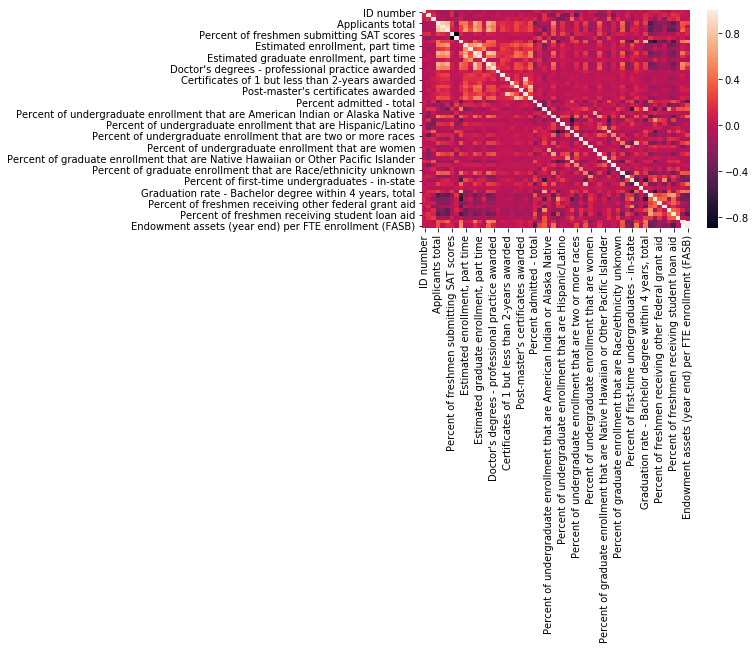

In [0]:
sns.heatmap(corr)

In [0]:
aid_list = ["Percent of freshmen receiving any financial aid",
            "Percent of freshmen  receiving federal grant aid",
            "Percent of freshmen receiving other federal grant aid",
            "Percent of freshmen receiving state/local grant aid",
            "Percent of freshmen receiving institutional grant aid",
            "Percent of freshmen receiving student loan aid",
            "Percent of freshmen receiving other loan aid"
           ]

In [0]:
aid = data[aid_list]

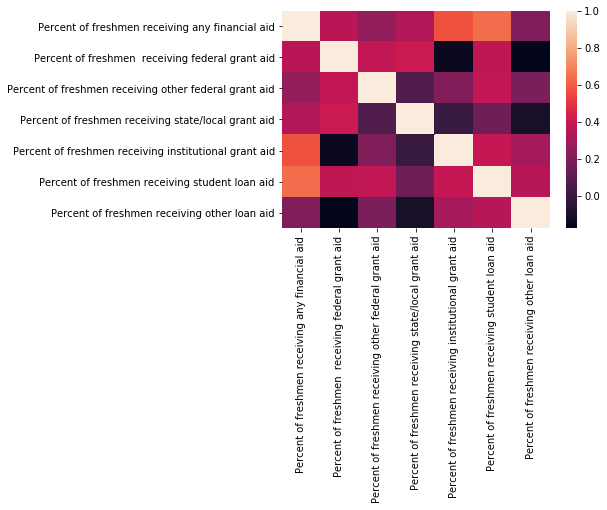

In [0]:
sns.heatmap(aid.corr())

In [0]:
data["Control of institution"]

0                       Public
1                       Public
2       Private not-for-profit
3                       Public
4                       Public
5                       Public
6                       Public
7                       Public
8                       Public
9       Private not-for-profit
10      Private not-for-profit
11      Private not-for-profit
12      Private not-for-profit
13                      Public
14      Private not-for-profit
15                      Public
16      Private not-for-profit
17      Private not-for-profit
18                      Public
19                      Public
20      Private not-for-profit
21      Private not-for-profit
22                      Public
23      Private not-for-profit
24      Private not-for-profit
25      Private not-for-profit
26                      Public
27      Private not-for-profit
28                      Public
29                      Public
                 ...          
1504    Private not-for-profit
1505    

In [0]:
data["Degree of urbanization (Urban-centric locale)"].value_counts()

City: Large        294
Suburb: Large      290
City: Small        225
City: Midsize      185
Town: Distant      165
Town: Remote       125
Town: Fringe        62
Rural: Fringe       58
Suburb: Midsize     49
Suburb: Small       36
Rural: Distant      30
Rural: Remote       15
Name: Degree of urbanization (Urban-centric locale), dtype: int64

In [0]:
urban = data["Degree of urbanization (Urban-centric locale)"].to_numpy()
for i in range(len(urban)):
  s = urban[i]
  if (s.find("Rural") != -1):
    urban[i] = 'Rural'
  elif (s.find("Suburb") != -1):
    urban[i] = 'Suburb'
  elif (s == "Town: Fringe"):
    urban[i] = 'Town: Remote'
    
data["Degree of urbanization (Urban-centric locale)"] = urban

In [0]:
for i in range(len(urban)):
  s = urban[i]
  if (s == "Rural"):
    urban[i] = 0
  elif (s == "Suburb"):
    urban[i] = 1
  elif (s == "Town: Remote"):
    urban[i] = 2
  elif (s == "Town: Distant"):
    urban[i] = 3
  elif (s =="City: Small"):
    urban[i] = 4
  elif (s == "City: Midsize"):
    urban[i] = 5
  else:
    urban[i] = 6
reduced["Degree of urbanization (Urban-centric locale)"] = urban

In [0]:
religous_col = []
for x in reduced["Religious affiliation"]:
  if x == "Not applicable":
    religous_col.append(0)
  else:
    religous_col.append(1)
    
reduced["Religious affiliation"] = religous_col

In [0]:
public = []
private = []

for t in data.itertuples():
  if not np.isnan(t[133]):
    if t[78] == "Public":
      public.append(t[133])
    else:
      private.append(t[133])
    
print(public)

[29.0, 53.0, 48.0, 25.0, 67.0, 27.0, 68.0, 31.0, 30.0, 45.0, 32.0, 33.0, 36.0, 28.0, 37.0, 12.0, 59.0, 61.0, 49.0, 21.0, 60.0, 26.0, 36.0, 41.0, 22.0, 42.0, 29.0, 30.0, 24.0, 70.0, 39.0, 52.0, 41.0, 52.0, 56.0, 29.0, 49.0, 53.0, 38.0, 60.0, 36.0, 46.0, 43.0, 91.0, 81.0, 86.0, 90.0, 66.0, 86.0, 81.0, 73.0, 59.0, 40.0, 66.0, 45.0, 48.0, 54.0, 25.0, 41.0, 46.0, 70.0, 70.0, 64.0, 37.0, 33.0, 26.0, 46.0, 33.0, 42.0, 52.0, 83.0, 51.0, 49.0, 45.0, 37.0, 82.0, 16.0, 67.0, 41.0, 41.0, 52.0, 77.0, 87.0, 50.0, 63.0, 42.0, 42.0, 34.0, 29.0, 31.0, 21.0, 30.0, 82.0, 36.0, 61.0, 50.0, 53.0, 82.0, 43.0, 29.0, 38.0, 40.0, 43.0, 36.0, 57.0, 25.0, 38.0, 31.0, 54.0, 24.0, 21.0, 60.0, 57.0, 84.0, 72.0, 51.0, 20.0, 43.0, 44.0, 50.0, 56.0, 60.0, 25.0, 42.0, 37.0, 42.0, 28.0, 26.0, 77.0, 24.0, 30.0, 24.0, 30.0, 22.0, 68.0, 70.0, 66.0, 41.0, 44.0, 62.0, 60.0, 49.0, 37.0, 46.0, 39.0, 18.0, 60.0, 53.0, 45.0, 53.0, 38.0, 50.0, 31.0, 20.0, 67.0, 33.0, 50.0, 37.0, 32.0, 42.0, 40.0, 38.0, 36.0, 32.0, 11.0, 45.0, 12.

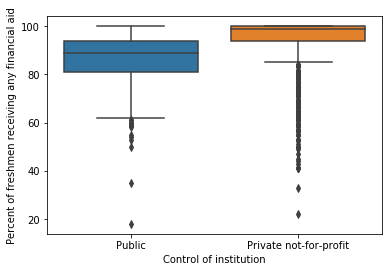

In [0]:
box = sns.boxplot(x = "Control of institution", y = "Percent of freshmen receiving any financial aid", data = data)

In [0]:
print(len(public))
print(len(private))

549
927


In [0]:
print(np.average(public))
print(np.average(private))

48.154826958105645
56.17044228694714


Observing whether university is public or private influences volume of financial aid. From this visualization, it seems like it does 

## Deleting Attributes Unrelated to our Analysis

In [0]:
nextdrop = ["ZIP code",
            "Highest degree offered",
            "County name",
            "Longitude location of institution",
            "Latitude location of institution",
            "Offers Less than one year certificate",
            "Offers One but less than two years certificate",
            "Offers Associate's degree",
            "Offers Two but less than 4 years certificate",
            "Offers Postbaccalaureate certificate",
            "Offers Master's degree",
            "Offers Post-master's certificate",
            "Offers Doctor's degree - research/scholarship",
            "Offers Doctor's degree - professional practice",
            "Offers Doctor's degree - other",
            "Offers Other degree",
            "Applicants total",
            "Admissions total",
            "Percent of freshmen submitting SAT scores",
            "Percent of freshmen submitting ACT scores",
            "Estimated enrollment, part time",
            "Estimated freshman enrollment, part time",
"Estimated graduate enrollment, total",
"Estimated graduate enrollment, part time",
"Associate's degrees awarded",
"Doctor's degrese - research/scholarship awarded",
"Doctor's degrees - professional practice awarded",
"Doctor's degrees - other awarded",
"Certificates of less than 1-year awarded",
"Certificates of 1 but less than 2-years awarded",
"Certificates of 2 but less than 4-years awarded",
"Postbaccalaureate certificates awarded",
"Post-master's certificates awarded",
"Number of students receiving a certificate of 1 but less than 4-years",
"Number of students receiving a Postbaccalaureate or Post-master's certificate",
"Admissions yield - total",
"FIPS state code",
"Geographic region",
"Sector of institution",
"Level of institution",
"Tribal college",
"Carnegie Classification 2010: Basic",
"Percent of graduate enrollment that are American Indian or Alaska Native",
"Percent of graduate enrollment that are Asian",
"Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander",
"Percent of graduate enrollment that are White",
"Percent of graduate enrollment that are two or more races",
            "Percent of graduate enrollment that are Race/ethnicity unknown",
            "Percent of graduate enrollment that are Nonresident Alien",
            "Percent of graduate enrollment that are women",
            "Percent of freshmen  receiving federal grant aid",
            "Percent of freshmen receiving other federal grant aid",
            "Percent of freshmen receiving state/local grant aid",
            "Percent of freshmen receiving institutional grant aid",
            "Percent of freshmen receiving student loan aid",
            "Percent of freshmen receiving other loan aid",
            "Endowment assets (year end) per FTE enrollment (GASB)",
            "Endowment assets (year end) per FTE enrollment (FASB)"
]

In [0]:
data["Percent of freshmen receiving any financial aid"].describe()

count    1492.000000
mean       90.672252
std        11.963692
min        18.000000
25%        87.000000
50%        95.000000
75%        99.000000
max       100.000000
Name: Percent of freshmen receiving any financial aid, dtype: float64

All the data is from 2013 so we can eliminate the year column. We are also eliminating County name since we already have attributes for ZIP code and state abbreviation. Longitude and latitude don't relate to the student's financial situation. Additionally, since we're not looking at grad students, we can delete the estimated graduate enrollment, part time.

Since we're only studying undergrads, we removed the columns relating to total enrollment and grad students.

We're studying "Percent of freshmen receiving any sort of aid" and realized that the other specifications of different kinds of aid are mere subsets of this one attribute, so these other ones do not give us any new information and only complicate our computations. Thus, we decided to remove them.

In [0]:
reduced = reduced.drop(nextdrop, axis = 1)
reduced["Total  enrollment"] = data["Total  enrollment"]

In [0]:
x = 0
for col in reduced.columns:
  print(col)
  x += 1

ID number
Name
Religious affiliation
Offers Bachelor's degree
Enrolled total
SAT Critical Reading 25th percentile score
Percent admitted - total
Tuition and fees, 2010-11
State abbreviation
Control of institution
Historically Black College or University
Degree of urbanization (Urban-centric locale)
Percent of undergraduate enrollment that are American Indian or Alaska Native
Percent of undergraduate enrollment that are Asian
Percent of undergraduate enrollment that are Black or African American
Percent of undergraduate enrollment that are Hispanic/Latino
Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander
Percent of undergraduate enrollment that are White
Percent of undergraduate enrollment that are two or more races
Percent of undergraduate enrollment that are Race/ethnicity unknown
Percent of undergraduate enrollment that are Nonresident Alien
Percent of undergraduate enrollment that are women
Percent of first-time undergraduates - in-state
Percent 

In [0]:
len(nextdrop)

58

In [0]:
reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 28 columns):
ID number                                                                                 1534 non-null int64
Name                                                                                      1534 non-null object
Religious affiliation                                                                     1534 non-null int64
Offers Bachelor's degree                                                                  1532 non-null object
Enrolled total                                                                            1377 non-null float64
SAT Critical Reading 25th percentile score                                                1169 non-null float64
Percent admitted - total                                                                  1376 non-null float64
Tuition and fees, 2010-11                                                                 1490 non-null float64
Sta

In [0]:
drop_rows = []
copy = reduced.to_numpy()
for i in range(len(copy)):
  if copy[i, 3] != "Yes":
    drop_rows.append(i)
  
reduced = reduced.drop(drop_rows)
reduced = reduced.drop(["Offers Bachelor's degree"], axis = 1)
reduced = reduced.reset_index(drop = True)


In [0]:
reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 27 columns):
ID number                                                                                 1522 non-null int64
Name                                                                                      1522 non-null object
Religious affiliation                                                                     1522 non-null int64
Enrolled total                                                                            1377 non-null float64
SAT Critical Reading 25th percentile score                                                1169 non-null float64
Percent admitted - total                                                                  1376 non-null float64
Tuition and fees, 2010-11                                                                 1490 non-null float64
State abbreviation                                                                        1522 non-null object
Con

In [0]:
np.unique(reduced["Percent of freshmen receiving any financial aid"].get_values())

array([ 18.,  22.,  33.,  35.,  41.,  43.,  44.,  45.,  47.,  49.,  50.,
        51.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,
        63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,
        74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,
        85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
        96.,  97.,  98.,  99., 100.,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan])

In [0]:
dropnan = []
nanlist = np.isnan(reduced["Percent of freshmen receiving any financial aid"].get_values())
for i in range(len(nanlist)):
  if nanlist[i]:
    dropnan.append(i)
reduced = reduced.drop(dropnan)
reduced = reduced.reset_index(drop = True)


In [0]:
reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 27 columns):
ID number                                                                                 1492 non-null int64
Name                                                                                      1492 non-null object
Religious affiliation                                                                     1492 non-null int64
Enrolled total                                                                            1373 non-null float64
SAT Critical Reading 25th percentile score                                                1167 non-null float64
Percent admitted - total                                                                  1373 non-null float64
Tuition and fees, 2010-11                                                                 1488 non-null float64
State abbreviation                                                                        1492 non-null object
Con

In [0]:
reduced.head()

,ID number,Name,Religious affiliation,Enrolled total,SAT Critical Reading 25th percentile score,Percent admitted - total,"Tuition and fees, 2010-11",State abbreviation,Control of institution,Historically Black College or University,Degree of urbanization (Urban-centric locale),Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of undergraduate enrollment that are White,Percent of undergraduate enrollment that are two or more races,Percent of undergraduate enrollment that are Race/ethnicity unknown,Percent of undergraduate enrollment that are Nonresident Alien,Percent of undergraduate enrollment that are women,Percent of first-time undergraduates - in-state,Percent of first-time undergraduates - foreign countries,Percent of first-time undergraduates - residence unknown,"Graduation rate - Bachelor degree within 4 years, total",Percent of freshmen receiving any financial aid,Total enrollment
0,100654,Alabama A & M University,0,1104.0,370.0,90.0,5800.0,Alabama,Public,Yes,5,0.0,0.0,95.0,1.0,0.0,3.0,0.0,1.0,0.0,51.0,NaN,NaN,NaN,10.0,97.0,5020.0
1,100663,University of Alabama at Birmingham,0,1773.0,520.0,87.0,5806.0,Alabama,Public,No,5,0.0,5.0,26.0,3.0,0.0,60.0,3.0,1.0,2.0,58.0,86.0,1.0,0.0,29.0,90.0,18568.0
2,100690,Amridge University,1,NaN,NaN,NaN,8360.0,Alabama,Private not-for-profit,No,5,0.0,0.0,42.0,1.0,0.0,29.0,0.0,27.0,0.0,61.0,NaN,NaN,NaN,0.0,100.0,631.0
3,100706,University of Alabama in Huntsville,0,651.0,510.0,81.0,7492.0,Alabama,Public,No,5,1.0,4.0,13.0,3.0,0.0,70.0,2.0,3.0,4.0,44.0,79.0,4.0,3.0,16.0,87.0,7376.0
4,100724,Alabama State University,0,1479.0,380.0,51.0,7164.0,Alabama,Public,Yes,5,0.0,0.0,93.0,1.0,0.0,2.0,1.0,1.0,2.0,59.0,58.0,4.0,0.0,9.0,93.0,6075.0


In [0]:
reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 27 columns):
ID number                                                                                 1492 non-null int64
Name                                                                                      1492 non-null object
Religious affiliation                                                                     1492 non-null int64
Enrolled total                                                                            1373 non-null float64
SAT Critical Reading 25th percentile score                                                1167 non-null float64
Percent admitted - total                                                                  1373 non-null float64
Tuition and fees, 2010-11                                                                 1488 non-null float64
State abbreviation                                                                        1492 non-null object
Con

In [0]:
residence = ["Percent of first-time undergraduates - in-state",
             "Percent of first-time undergraduates - foreign countries",
             "Percent of first-time undergraduates - residence unknown",
             "SAT Critical Reading 25th percentile score",
             "Enrolled total",
             "Percent admitted - total"
            ]

reduced = reduced.drop(residence, axis=1)

In [0]:
reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 21 columns):
ID number                                                                                 1492 non-null int64
Name                                                                                      1492 non-null object
Religious affiliation                                                                     1492 non-null int64
Tuition and fees, 2010-11                                                                 1488 non-null float64
State abbreviation                                                                        1492 non-null object
Control of institution                                                                    1492 non-null object
Historically Black College or University                                                  1492 non-null object
Degree of urbanization (Urban-centric locale)                                             1492 non-null object
Percen

In [0]:
reduced.head()

,ID number,Name,Religious affiliation,"Tuition and fees, 2010-11",State abbreviation,Control of institution,Historically Black College or University,Degree of urbanization (Urban-centric locale),Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of undergraduate enrollment that are White,Percent of undergraduate enrollment that are two or more races,Percent of undergraduate enrollment that are Race/ethnicity unknown,Percent of undergraduate enrollment that are Nonresident Alien,Percent of undergraduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total",Percent of freshmen receiving any financial aid,Total enrollment
0,100654,Alabama A & M University,0,5800.0,Alabama,Public,Yes,5,0.0,0.0,95.0,1.0,0.0,3.0,0.0,1.0,0.0,51.0,10.0,97.0,5020.0
1,100663,University of Alabama at Birmingham,0,5806.0,Alabama,Public,No,5,0.0,5.0,26.0,3.0,0.0,60.0,3.0,1.0,2.0,58.0,29.0,90.0,18568.0
2,100690,Amridge University,1,8360.0,Alabama,Private not-for-profit,No,5,0.0,0.0,42.0,1.0,0.0,29.0,0.0,27.0,0.0,61.0,0.0,100.0,631.0
3,100706,University of Alabama in Huntsville,0,7492.0,Alabama,Public,No,5,1.0,4.0,13.0,3.0,0.0,70.0,2.0,3.0,4.0,44.0,16.0,87.0,7376.0
4,100724,Alabama State University,0,7164.0,Alabama,Public,Yes,5,0.0,0.0,93.0,1.0,0.0,2.0,1.0,1.0,2.0,59.0,9.0,93.0,6075.0


In [0]:
floatcol = []
intdict = {}

for col in reduced.columns:
  if (reduced[col].dtype == "float64"):
    floatcol.append(col)

for col in floatcol:
  arr = reduced[col].get_values()
  int_arr = []
  for i in range(len(arr)):
    if np.isnan(arr[i]):
      int_arr.append(0)
    else:
      int_arr.append(int(arr[i]))
  intdict[col] = int_arr
  
reduced.drop(floatcol, axis = 1)
for col in floatcol:
  reduced[col] = intdict[col]
  
reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 21 columns):
ID number                                                                                 1492 non-null int64
Name                                                                                      1492 non-null object
Religious affiliation                                                                     1492 non-null int64
Tuition and fees, 2010-11                                                                 1492 non-null int64
State abbreviation                                                                        1492 non-null object
Control of institution                                                                    1492 non-null object
Historically Black College or University                                                  1492 non-null object
Degree of urbanization (Urban-centric locale)                                             1492 non-null object
Percent 

In [0]:
text_col = ["Degree of urbanization (Urban-centric locale)",
            "State abbreviation",
            "Control of institution",
            "Historically Black College or University"
           ]

le_dict = {}

for col in text_col:
  le_dict[col] = pre.LabelEncoder()

In [0]:
reduced_religous = reduced
religous_col = []
for x in reduced["Religious affiliation"]:
  if x == "Not applicable":
    religous_col.append(0)
  else:
    religous_col.append(1)
    
reduced_religous["Religious affiliation"] = religous_col

In [0]:
test_data = reduced.sample(frac = 0.2, random_state = 123)

training_data = reduced.drop(test_data.index)

In [0]:
X = training_data.drop(["ID number", "Name", "Percent of freshmen receiving any financial aid"], axis = 1)
X.head()

,Religious affiliation,"Tuition and fees, 2010-11",State abbreviation,Control of institution,Historically Black College or University,Degree of urbanization (Urban-centric locale),Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of undergraduate enrollment that are White,Percent of undergraduate enrollment that are two or more races,Percent of undergraduate enrollment that are Race/ethnicity unknown,Percent of undergraduate enrollment that are Nonresident Alien,Percent of undergraduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total",Total enrollment
0,1,5800,Alabama,Public,Yes,5,0,0,95,1,0,3,0,1,0,51,10,5020
1,1,5806,Alabama,Public,No,5,0,5,26,3,0,60,3,1,2,58,29,18568
2,1,8360,Alabama,Private not-for-profit,No,5,0,0,42,1,0,29,0,27,0,61,0,631
3,1,7492,Alabama,Public,No,5,1,4,13,3,0,70,2,3,4,44,16,7376
4,1,7164,Alabama,Public,Yes,5,0,0,93,1,0,2,1,1,2,59,9,6075


In [0]:
y = training_data["Percent of freshmen receiving any financial aid"]
y.head()

0     97
1     90
2    100
3     87
4     93
Name: Percent of freshmen receiving any financial aid, dtype: int64

In [0]:
for col in text_col:
  X[col] = le_dict[col].fit_transform(X[col])
  
X.head()

,Religious affiliation,"Tuition and fees, 2010-11",State abbreviation,Control of institution,Historically Black College or University,Degree of urbanization (Urban-centric locale),Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of undergraduate enrollment that are White,Percent of undergraduate enrollment that are two or more races,Percent of undergraduate enrollment that are Race/ethnicity unknown,Percent of undergraduate enrollment that are Nonresident Alien,Percent of undergraduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total",Total enrollment
0,1,5800,0,1,1,5,0,0,95,1,0,3,0,1,0,51,10,5020
1,1,5806,0,1,0,5,0,5,26,3,0,60,3,1,2,58,29,18568
2,1,8360,0,0,0,5,0,0,42,1,0,29,0,27,0,61,0,631
3,1,7492,0,1,0,5,1,4,13,3,0,70,2,3,4,44,16,7376
4,1,7164,0,1,1,5,0,0,93,1,0,2,1,1,2,59,9,6075


In [0]:
knr = LinearRegression()

knr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
aid_est = knr.predict(X)

In [0]:
training_with_est = training_data
training_with_est["Estimated percent of freshmen recieving aid"] = aid_est
training_with_est[
    ["Name",
     "Percent of freshmen receiving any financial aid",
     "Estimated percent of freshmen recieving aid"
    ]
].head()

,Name,Percent of freshmen receiving any financial aid,Estimated percent of freshmen recieving aid
0,Alabama A & M University,97,92.485040
1,University of Alabama at Birmingham,90,85.024433
2,Amridge University,100,100.643445
3,University of Alabama in Huntsville,87,88.737648
4,Alabama State University,93,91.583734


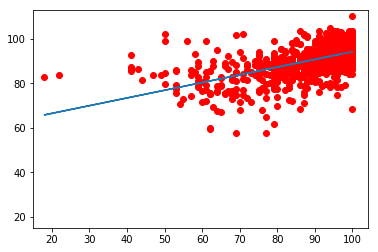

In [0]:
cov_m = np.cov(y, aid_est)
m = cov_m[0][1] / cov_m[0][0]
b = np.average(aid_est) - m*np.average(y)
line_vals = (m*np.array(y))+b
f, ax = plt.subplots(1)
ax.plot(y, aid_est, "ro")
ax.set_ylim(bottom = 15)
ax.set_xlim(left = 15)
plt.plot(y, line_vals)

In [0]:
print(mean_squared_error(y, aid_est))

88.06260288554488


In [0]:
print(np.corrcoef(y, aid_est)[0][1])

0.588933470223121


In [0]:
X_test = test_data.drop(["ID number", "Name", "Percent of freshmen receiving any financial aid"], axis = 1)
X_test.head()

,Religious affiliation,"Tuition and fees, 2010-11",State abbreviation,Control of institution,Historically Black College or University,Degree of urbanization (Urban-centric locale),Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of undergraduate enrollment that are White,Percent of undergraduate enrollment that are two or more races,Percent of undergraduate enrollment that are Race/ethnicity unknown,Percent of undergraduate enrollment that are Nonresident Alien,Percent of undergraduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total",Total enrollment
1070,1,25610,Pennsylvania,Private not-for-profit,No,1,0,5,24,4,0,61,0,5,0,75,50,2371
486,1,6904,Maryland,Public,No,1,0,1,27,4,0,60,4,1,2,49,22,5473
35,1,7672,Arizona,Public,No,4,3,2,3,19,0,63,5,1,4,58,30,26594
327,1,22590,Indiana,Private not-for-profit,No,4,0,1,12,6,0,78,2,0,1,66,47,1804
1457,1,7380,Michigan,Private not-for-profit,No,1,0,0,4,2,0,91,3,0,0,74,0,1039


In [0]:
y_test = test_data["Percent of freshmen receiving any financial aid"]
y_test.head()

1070    100
486      83
35       83
327     100
1457     95
Name: Percent of freshmen receiving any financial aid, dtype: int64

In [0]:
for col in text_col:
  print(col)
  X_test[col] = le_dict[col].transform(X_test[col])
  
X_test.head()

Degree of urbanization (Urban-centric locale)
State abbreviation
Control of institution
Historically Black College or University


,Religious affiliation,"Tuition and fees, 2010-11",State abbreviation,Control of institution,Historically Black College or University,Degree of urbanization (Urban-centric locale),Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of undergraduate enrollment that are White,Percent of undergraduate enrollment that are two or more races,Percent of undergraduate enrollment that are Race/ethnicity unknown,Percent of undergraduate enrollment that are Nonresident Alien,Percent of undergraduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total",Total enrollment
1070,1,25610,38,0,0,1,0,5,24,4,0,61,0,5,0,75,50,2371
486,1,6904,20,1,0,1,0,1,27,4,0,60,4,1,2,49,22,5473
35,1,7672,2,1,0,4,3,2,3,19,0,63,5,1,4,58,30,26594
327,1,22590,14,0,0,4,0,1,12,6,0,78,2,0,1,66,47,1804
1457,1,7380,22,0,0,1,0,0,4,2,0,91,3,0,0,74,0,1039


In [0]:
aid_est_test = knr.predict(X_test)

In [0]:
test_with_est = test_data
test_with_est["Estimated percent of freshmen recieving aid"] = aid_est_test
test_with_est[
    ["Name",
     "Percent of freshmen receiving any financial aid",
     "Estimated percent of freshmen recieving aid"
    ]
].head()

,Name,Percent of freshmen receiving any financial aid,Estimated percent of freshmen recieving aid
1070,Gwynedd Mercy University,100,95.992326
486,Frostburg State University,83,89.043123
35,Northern Arizona University,83,83.871610
327,Bethel College-Indiana,100,96.765560
1457,Baker College of Port Huron,95,104.099417


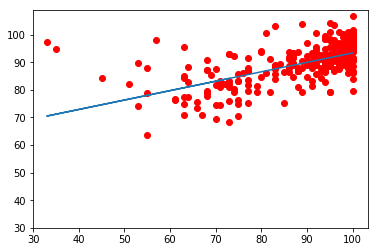

In [0]:
y_t = test_with_est["Percent of freshmen receiving any financial aid"]
cov_m_t = np.cov(y_t, aid_est_test)
m_t = cov_m_t[0][1] / cov_m_t[0][0]
b_t = np.average(aid_est_test) - m_t*np.average(y)
line_vals = (m_t*np.array(y_t))+b_t
f, ax_t = plt.subplots(1)
ax_t.plot(y_t, aid_est_test, "ro")
ax_t.set_ylim(bottom = 30)
ax_t.set_xlim(left = 30)
plt.plot(y_t, line_vals)

In [0]:
print(mean_squared_error(y_t, aid_est_test))

110.71474396781576


In [0]:
print(np.corrcoef(y_t, aid_est_test)[0][1])

0.6085629696823607
